In [91]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

In [92]:
class Perceptron:
    def __init__(self, eta, epochs, activationFunction):
        self.weights=np.random.rand(3)*1e-4
        print(f"self.weights: {self.weights}")
        self.eta=eta
        self.epochs=epochs
        self.activationFunction=activationFunction
    def fit(self, X, y):
        self.X=X
        print(f"self.X: \n {self.X}")
        self.y=y
        print(f"self.y: \n {self.y}")
        
        X_with_bias=np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X_with_bias_in fit_fun: \n{X_with_bias}")
        for epoch in range(self.epochs):
            y_hat=self.activationFunction(X_with_bias, self.weights)
            print(f"Predicted Value: \n{y_hat}")
            error=self.y-y_hat
            print(f"Error: \n{error}")
            self.weights=self.weights+self.eta*np.dot(X_with_bias.T, error)
            print(f"Updated weights: \n{self.weights}")
            print("############################\n")
    def predict(self, X):
        X_with_bias=np.c_[X, -np.ones((len(X),1))]
        print(f"X_with_bias_in predict_fun: \n{X_with_bias}")
        return self.activationFunction(X_with_bias, self.weights)
            

In [93]:
activationFunction=lambda inputs, weights: np.where(np.dot(inputs, weights)>0,1,0)
""" Alternatives of lambda function of activationFunction
def activationFunction(inputs, weights):
    z=np.dot(inputs, weights)
    y_hat=np.where(z > 0, 1,0)
    return y_hat
def activationFunction(inputs, weights):
    z=np.dot(inputs, weights)
    if z>0:
        y_hat=1
    else:
        y_hat=0
"""

' Alternatives of lambda function of activationFunction\ndef activationFunction(inputs, weights):\n    z=np.dot(inputs, weights)\n    y_hat=np.where(z > 0, 1,0)\n    return y_hat\ndef activationFunction(inputs, weights):\n    z=np.dot(inputs, weights)\n    if z>0:\n        y_hat=1\n    else:\n        y_hat=0\n'

In [94]:
data={"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}
AND=pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [95]:
X=AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [96]:
y=AND["y"]
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [98]:
model=Perceptron(eta=0.01, epochs=10,activationFunction=activationFunction)

self.weights: [4.91893260e-05 7.44448475e-05 1.24549818e-05]


In [99]:
model.fit(X,y)

self.X: 
    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
self.y: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
X_with_bias_in fit_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Predicted Value: 
[0 1 1 1]
Error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights: 
[-0.00995081 -0.00992556  0.02001245]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights: 
[4.91893260e-05 7.44448475e-05 1.00124550e-02]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights: 
[1.00491893e-02 1.00744448e-02 1.24549818e-05]
############################

Predicted Value: 
[0 1 1 1]
Error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights: 
[4.91893260e-05 7.44448475e-05 2.00124550e-02]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype:

In [62]:
model.predict(X)

X_with_bias_in predict_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([0, 0, 0, 1])

# OR Gate

In [64]:
data={"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,1]}
OR=pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [65]:
X=OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [66]:
y=OR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [85]:
model=Perceptron(eta=0.01, epochs=10,activationFunction=activationFunction)

self.weights: [2.91092332e-05 8.33165001e-05 2.76900986e-05]


In [101]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [102]:
y.values

array([0, 0, 0, 1], dtype=int64)

In [103]:
X.shape

(4, 2)

In [104]:
y.shape

(4,)

In [105]:
model.fit(X,y)

self.X: 
    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
self.y: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
X_with_bias_in fit_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Predicted Value: 
[0 0 0 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[0.01004919 0.01007444 0.02001245]
############################

Predicted Value: 
[0 0 0 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[0.01004919 0.01007444 0.02001245]
############################

Predicted Value: 
[0 0 0 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[0.01004919 0.01007444 0.02001245]
############################

Predicted Value: 
[0 0 0 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[0.01004919 0.01007444 0.02001245]
############################

Predicted Value: 
[0 0 0 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[0.01004919 0.

In [106]:
model.weights

array([0.01004919, 0.01007444, 0.02001245])

# Load and save the model

In [109]:
import os

# saving model
dir_ = "model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
#joblib.dump(model, filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

EOFError: 

In [108]:
model.predict(X)

X_with_bias_in predict_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([0, 0, 0, 1])

# X-OR Gate

In [71]:
data={"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,0]}
X_OR=pd.DataFrame(data)
X_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [72]:
X=X_OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [73]:
y=X_OR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [74]:
model=Perceptron(eta=0.01, epochs=10,activationFunction=activationFunction)

self.weights: [4.25565681e-05 8.12891989e-05 3.58374970e-05]


In [75]:
model.fit(X,y)

X_with_bias_in fit_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Predicted Value: 
[0 1 1 1]
Error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights: 
[-0.00995744 -0.00991871  0.01003584]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights: 
[ 4.25565681e-05  8.12891989e-05 -9.96416250e-03]
############################

Predicted Value: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights: 
[-0.00995744 -0.00991871  0.01003584]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights: 
[ 4.25565681e-05  8.12891989e-05 -9.96416250e-03]
############################

Predicted Value: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights: 
[-0.00995744 -0.00991871  0.01003584]
############################

Predicted Value: 
[0 0 0 0]
Er

In [76]:
model.predict(X)

X_with_bias_in predict_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([1, 1, 1, 1])

# Analysis with graph
#### AND GATE

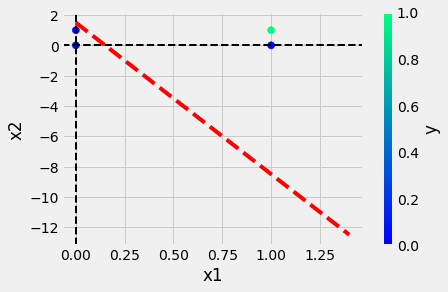

In [63]:
AND.plot(kind='scatter', x="x1", y="x2", c="y",s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)
x=np.linspace(0,1.4)
y=1.5 - 1*np.linspace(0,14)
plt.plot(x,y,"r--")

# OR Experiments

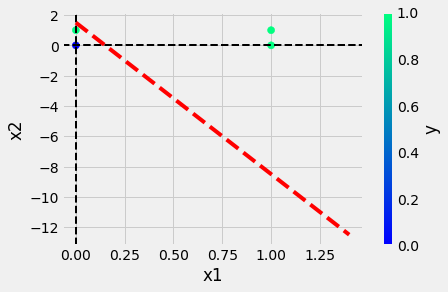

In [70]:
OR.plot(kind='scatter', x="x1", y="x2", c="y",s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)
x=np.linspace(0,1.4)
y=1.5 - 1*np.linspace(0,14)
plt.plot(x,y,"r--")

# X_OR Experiments

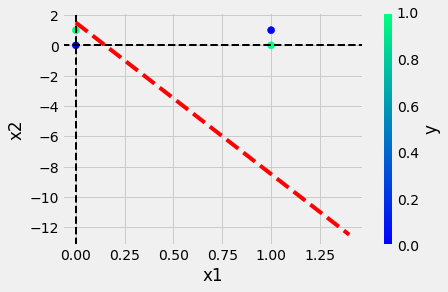

In [77]:
X_OR.plot(kind='scatter', x="x1", y="x2", c="y",s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)
x=np.linspace(0,1.4)
y=1.5 - 1*np.linspace(0,14)
plt.plot(x,y,"r--")